
<h1 dir="rtl" style="font-family: Vazir; width: 85%;">تمرین شماره ۱: درس بازیابی هوشمند اطلاعات - دانشگاه تهران، پائیز ۱۴۰۴</h1>

<div dir="rtl" style="font-family: Vazir; width: 85%; font-size: 18px;">
نام: سهیل حاجیان منش
<br/>
شماره دانشجویی: 810100119

<div dir="rtl" style="font-family: Vazir; width: 85%; font-size: 16px;">
سوالات خودتان را می‌توانید از طریق ایمیل
<code>kargaran.sina@gmail.com</code>
 از طراح تمرین ۱ بپرسید.

<div dir="rtl" style="font-family: Vazir; width: 85%; font-size: 18px; color: red; font-weight: bold;">
قوانین و توضیحاتی آخر فایل تمرین حتما به دقت مطالعه شود.
</div>

In [ ]:
!pip install nltk
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scipy
!pip install ir_datasets

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import importlib
import document_processing as dp
import inverted_index as ii
import query_processing as qp
import evaluation as ev
importlib.reload(ev)

<module 'evaluation' from 'd:\\UT\\term 9\\IIR\\CA1\\code\\evaluation.py'>

In [5]:
import retrieval_models as rm  # Your initial import

# ... after you make changes to retrieval_models.py ...
importlib.reload(rm)  # This loads the latest version

<module 'retrieval_models' from 'd:\\UT\\term 9\\IIR\\CA1\\code\\retrieval_models.py'>

In [6]:
# Ensure NLTK data is downloaded
import nltk
import numpy as np
import pandas as pd

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

### document_processing.py

In short, this module:

Loads a dataset of text documents.

Cleans and preprocesses each document (tokenization, lowercasing, stop-word removal, stemming).

Prepares the text data in a structured format (Document objects) for later use in tasks.

1. Document Class

    Represents a single text document with:

    - doc_id: a unique identifier.

    - text: the original document content.

    - tokens: the processed version of the text (after cleaning and tokenization).

    - metadata: optional dictionary for additional data (like author, date, etc.).

    - Method:

        preprocess(self, stop_words=None) → Calls the preprocess_text function to transform the raw text into normalized tokens.

2. preprocess_text(text, stop_words=None) Function

    Performs the actual text cleaning and normalization steps:

    a. Removes non-alphabetic characters (e.g., punctuation, numbers).

    b. Tokenizes the text into individual words.

    c. Converts all tokens to lowercase.

    d. Removes stop words (like “and”, “the”, etc.).

    e. Applies stemming using NLTK’s PorterStemmer to reduce words to their base form (e.g., “running” → “run”).

    e. Returns a list of cleaned tokens.

3. load_documents() Function

    Loads a real-world  **antique** dataset using ir_datasets.

    Iterates through all documents in the dataset.

    Creates a list of Document objects (each containing doc_id and text).

    Returns a list of all these Document instances.

### query_processing.py

Does the same thing as `document_processing.py`.

#### What is the role of each preprocessing step in final result of retrieval model ? 

- Removing non-alphabetic characters:
    
    Eliminates noise (numbers, punctuation, symbols) that don’t contribute to meaning — helps focus only on meaningful text.

- Tokenization:

    Breaks text into individual words (tokens), making it possible to index and compare words between queries and documents.

- Lowercasing:

    Ensures consistency by treating “Apple” and “apple” as the same word — improves matching between query and document terms.

- Stop-word removal:
    
    Removes extremely common words (like the, is, and) that do not carry meaningful information — improves relevance and reduces index size.

- Stemming:
    
    Reduces words to their root form (e.g., running, runs, ran → run) — allows matching different word forms and improves recall.

### evaluation.py

**Class: EvaluationMetrics**

1. precision_at_k()

    Measures how many of the top-k retrieved items are actually relevant —  evaluates ranking accuracy at a specific cutoff.

2. recall()
    
    Measures how many of all the relevant documents were retrieved, regardless of rank — evaluates coverage of the retrieval system.

3. recall_at_k()
    
    Measures how many relevant documents are found within the top-k retrieved results — a cutoff version of recall focusing on the most important part of the ranking.
    
4. average_precision()

    Measures the average of precision values at every rank where a relevant document is found — rewards ranking systems that place relevant items higher.

5. mean_average_precision() (MAP)
    
    Measures the mean of Average Precision across all queries — evaluates the 
    overall ranking performance of a retrieval model over multiple searches.

6. ndcg() (Normalized Discounted Cumulative Gain)
    
    Measures how well the ranking order matches the ideal order based on graded relevance — rewards systems that rank highly relevant documents near the top.

7. mean_reciprocal_rank() (MRR)
    
    Measures how early the first relevant document appears in the ranking, averaged over all queries — reflects the system’s ability to quickly return a relevant result.

8. load_relevance_judgments()

    Loads the ground truth relevance data (query–document relevance scores) from the dataset — used as the evaluation reference.

9. evaluate_scoring_method()

    Evaluates a retrieval or scoring model across multiple metrics (MAP, MRR, Precision@k, Recall@k, nDCG@k) — provides an overall performance summary of the ranking system.

### inverted_index.py

**Class: InvertedIndex**

Represents an inverted index structure that maps each term to the documents it appears in — used to enable fast text search and retrieval.

1. __init__()

    Initializes data structures for storing term-document mappings, document statistics, and token information.

2. add_document(document)

    Adds a single document to the index by recording each term’s frequency and updating document-level statistics.

3. build_index(documents)

    Builds the entire inverted index from a collection of documents and computes global stats like average document length.

4. get_postings(term)

    Retrieves the postings list (all documents and term frequencies) for a given term.

5. compute_idf(term)

    Calculates the Inverse Document Frequency (IDF) for a term using a smoothed formula, reflecting how rare or common the term is across documents. Produces more stable and realistic weighting across all terms. It’s commonly used in BM25 and other modern retrieval models.

6. compute_idf_without_smoothing(term)

    Computes the standard (unsmoothed) IDF value for a term — a simpler version for comparison or alternative scoring. It can over-penalize very frequent words or inflate rare ones too much.

#### Question: Typically, for document indexing, specific data structures are used, Research and provide a brief explanation of each.

1. **Lexicon**

    A Lexicon is a list or set of all unique terms (words) that appear in the document collection.

    Stores the terms in a structured way for quick look-up.

    Often contains metadata like document frequency (number of documents a term appears in) or pointers to postings lists.

2. **Posting Index / Inverted Index**

    An Inverted Index maps each term to a list of documents (and optionally term frequencies or positions) where the term occurs.
    
    Enables fast search by term.
    
    Supports ranking algorithms (TF-IDF, BM25) using term frequency and document statistics.
    
3. **Document Index**

    A Document Index stores information about each document, such as its length, term counts, or other document-level statistics.

    Helps calculate ranking scores that depend on document properties (e.g., average document length in BM25).

    Can be used for retrieving document metadata or for normalization in scoring functions.

4. **MetaIndex**

    A MetaIndex stores additional metadata about documents or terms, such as author, publication date, category, or document type.
    
    Supports advanced search features like filtering or faceted search.
    
    Allows indexing and retrieval based on non-textual attributes.

# **سوال اول:**

## Loading the dataset 1

In [7]:
# 1. Data Loading and Preprocessing

print("Loading and preprocessing documents...")
documents = dp.load_documents()
for idx, doc in enumerate(documents):
    doc.preprocess()
    if (idx + 1) % 40_000 == 0 or idx == len(documents) - 1:
        print(f"Processed {idx+1}/{len(documents)} documents")
        
print("Building inverted index...")
inverted_index = ii.InvertedIndex()
inverted_index.build_index(documents)

print("Loading and preprocessing queries...")
queries = qp.load_queries()
for query in queries:
    query.preprocess()

print("Loading relevance judgments...")
relevance_judgments = ev.load_relevance_judgments()

Loading and preprocessing documents...
Manually loading documents from: C:\Users\Lenovo\.ir_datasets\antique\collection.tsv with UTF-8 encoding...
Successfully loaded 403666 documents.
Processed 40000/403666 documents
Processed 80000/403666 documents
Processed 120000/403666 documents
Processed 160000/403666 documents
Processed 200000/403666 documents
Processed 240000/403666 documents
Processed 280000/403666 documents
Processed 320000/403666 documents
Processed 360000/403666 documents
Processed 400000/403666 documents
Processed 403666/403666 documents
Building inverted index...
Loading and preprocessing queries...
Loading relevance judgments...


## Example

In [8]:
print("\nSample run with BM25 (k=1.2, b=0.75)")
params = {'k': 1.2, 'b': 0.75}
evaluation_results = ev.evaluate_scoring_method(inverted_index,rm.bm25_score, queries, relevance_judgments, params=params)
print(evaluation_results)
print(f"MAP for BM25 (k={1.2}, b={0.75}): {evaluation_results['MAP']}")


Sample run with BM25 (k=1.2, b=0.75)
{'MAP': 0.1964, 'MRR': 0.5054, 'Precision@3': 0.3083, 'Precision@10': 0.234, 'Recall@3': 0.0852, 'Recall@10': 0.2003, 'nDCG@10': 0.3976}
MAP for BM25 (k=1.2, b=0.75): 0.1964


## **الف**

**Step1** : Coarse search first (long steps) to quickly locate the promising region.

In [9]:
k_coarse = np.arange(0, 3.1, 0.5)
b_coarse = np.arange(0, 1.1, 0.25)

In [ ]:
results_coarse = []

print("Coarse search for BM25 parameters...")
for b in k_coarse:
    for b in b_coarse:
        params = {"k": b, "b": b}
        eval_res = ev.evaluate_scoring_method(
            inverted_index, rm.bm25_score, queries, relevance_judgments, params=params
        )
        results_coarse.append({"k": b, "b": b, "MAP": eval_res["MAP"]})
        print(f"k={b:.2f}, b={b:.2f}, MAP={eval_res['MAP']}")

df_coarse = pd.DataFrame(results_coarse)
best_coarse = df_coarse.loc[df_coarse["MAP"].idxmax()]
print(
    f"\nBest coarse parameters: k={best_coarse['k']}, b={best_coarse['b']}, MAP={best_coarse['MAP']}"
)

Coarse search for BM25 parameters...
k=0.00, b=0.00, MAP=0.1499
k=0.00, b=0.25, MAP=0.1499
k=0.00, b=0.50, MAP=0.1499
k=0.00, b=0.75, MAP=0.1499
k=0.00, b=1.00, MAP=0.1499
k=0.50, b=0.00, MAP=0.1667
k=0.50, b=0.25, MAP=0.2342
k=0.50, b=0.50, MAP=0.2369
k=0.50, b=0.75, MAP=0.2173
k=0.50, b=1.00, MAP=0.1936
k=1.00, b=0.00, MAP=0.1575
k=1.00, b=0.25, MAP=0.2375
k=1.00, b=0.50, MAP=0.2325
k=1.00, b=0.75, MAP=0.2014
k=1.00, b=1.00, MAP=0.1571
k=1.50, b=0.00, MAP=0.1465
k=1.50, b=0.25, MAP=0.2292
k=1.50, b=0.50, MAP=0.2225
k=1.50, b=0.75, MAP=0.1875
k=1.50, b=1.00, MAP=0.1307
k=2.00, b=0.00, MAP=0.1375
k=2.00, b=0.25, MAP=0.2213
k=2.00, b=0.50, MAP=0.2154
k=2.00, b=0.75, MAP=0.1735
k=2.00, b=1.00, MAP=0.1134
k=2.50, b=0.00, MAP=0.1284
k=2.50, b=0.25, MAP=0.2128
k=2.50, b=0.50, MAP=0.2078
k=2.50, b=0.75, MAP=0.1665
k=2.50, b=1.00, MAP=0.099
k=3.00, b=0.00, MAP=0.1224
k=3.00, b=0.25, MAP=0.206
k=3.00, b=0.50, MAP=0.2021
k=3.00, b=0.75, MAP=0.1582
k=3.00, b=1.00, MAP=0.0891

Best coarse paramet

**Step 2** : Fine search next (small steps) to find the optimal values.

In [ ]:
k_fine = np.arange(max(0, best_coarse["k"] - 0.3), min(3, best_coarse["k"] + 0.4), 0.1)
b_fine = np.arange(max(0, best_coarse["b"] - 0.2), min(1, best_coarse["b"] + 0.25), 0.1)

results_fine = []

print("\nFine search for BM25 parameters...")
for b in k_fine:
    for b in b_fine:
        params = {"k": b, "b": b}
        eval_res = ev.evaluate_scoring_method(
            inverted_index, rm.bm25_score, queries, relevance_judgments, params=params
        )
        results_fine.append({"k": b, "b": b, "MAP": eval_res["MAP"]})
        print(f"k={b:.2f}, b={b:.2f}, MAP={eval_res['MAP']}")

df_fine = pd.DataFrame(results_fine)
best_fine = df_fine.loc[df_fine["MAP"].idxmax()]
print(
    f"\nBest fine parameters: k={best_fine['k']:.2f}, b={best_fine['b']:.2f}, MAP={best_fine['MAP']}"
)


Fine search for BM25 parameters...
k=0.70, b=0.05, MAP=0.1932
k=0.70, b=0.15, MAP=0.2246
k=0.70, b=0.25, MAP=0.2388
k=0.70, b=0.35, MAP=0.2414
k=0.70, b=0.45, MAP=0.2407
k=0.80, b=0.05, MAP=0.1928
k=0.80, b=0.15, MAP=0.2235
k=0.80, b=0.25, MAP=0.2402
k=0.80, b=0.35, MAP=0.2424
k=0.80, b=0.45, MAP=0.24
k=0.90, b=0.05, MAP=0.1915
k=0.90, b=0.15, MAP=0.2233
k=0.90, b=0.25, MAP=0.2381
k=0.90, b=0.35, MAP=0.241
k=0.90, b=0.45, MAP=0.2394
k=1.00, b=0.05, MAP=0.1908
k=1.00, b=0.15, MAP=0.2227
k=1.00, b=0.25, MAP=0.2375
k=1.00, b=0.35, MAP=0.2396
k=1.00, b=0.45, MAP=0.2372
k=1.10, b=0.05, MAP=0.19
k=1.10, b=0.15, MAP=0.2215
k=1.10, b=0.25, MAP=0.2356
k=1.10, b=0.35, MAP=0.2387
k=1.10, b=0.45, MAP=0.2359
k=1.20, b=0.05, MAP=0.1881
k=1.20, b=0.15, MAP=0.2207
k=1.20, b=0.25, MAP=0.2345
k=1.20, b=0.35, MAP=0.2382
k=1.20, b=0.45, MAP=0.2335
k=1.30, b=0.05, MAP=0.1868
k=1.30, b=0.15, MAP=0.2179
k=1.30, b=0.25, MAP=0.233
k=1.30, b=0.35, MAP=0.2359
k=1.30, b=0.45, MAP=0.2324

Best fine parameters: k=

**Step 3** : Heatmap of MAP for fine search

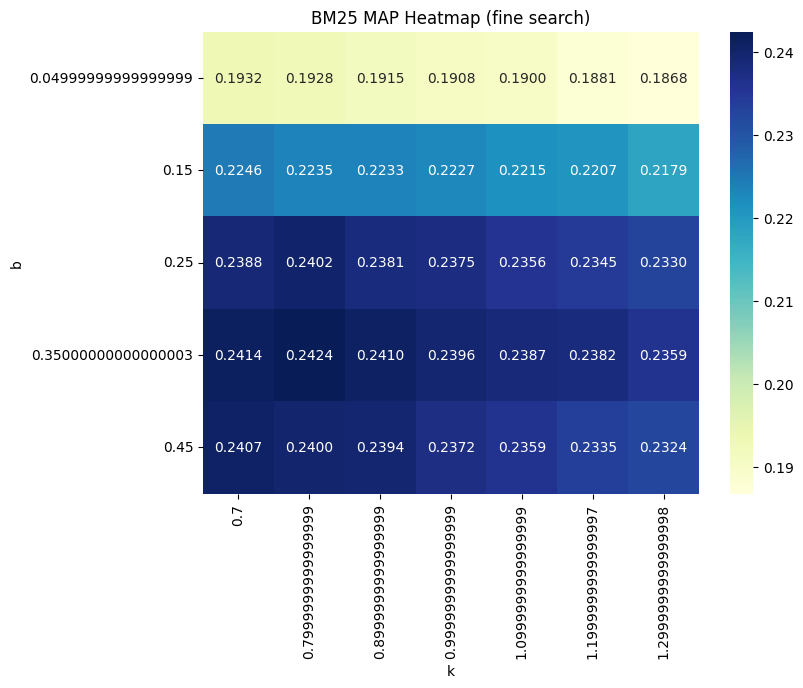

In [25]:
pivot = df_fine.pivot(index="b", columns="k", values="MAP")
plt.figure(figsize=(8, 6))

sns.heatmap(pivot, annot=True, fmt=".4f", cmap="YlGnBu")
plt.title("BM25 MAP Heatmap (fine search)")
plt.xlabel("k")
plt.ylabel("b")
plt.show()

1. **Analyze the effect of k (term frequency saturation)**

    k controls how much the term frequency in a document influences the score.

    Higher k values (e.g., >2) lead to diminishing returns or even worse MAP, as seen in coarse search.

    A relatively low k (less than 1) means that repeated terms in a document do not strongly indicate higher relevance.

    This can be because of two factors: 

    1. Documents are short to medium length, so term repetition is limited.

    2. Excessive term repetition doesn’t correlate strongly with relevance.

    Optimal `k=0.80` suggests moderate saturation works best for this dataset.

2. **Analyze the effect of b (document length normalization)**

    b adjusts the influence of document length relative to the average.

    b=0 ignores length; b=1 fully normalizes by length.

    Fine search shows `b=0.35` is best, indicating :
    
    1. Partial length normalization improves MAP: longer documents are slightly penalized, shorter slightly boosted.  
    
    2. Relevance is not strongly dependent on document length, but we still want to avoid very long documents dominating scores just because they contain more terms.
    
    3. Your collection likely contains documents of relatively similar length, or length differences do not strongly correlate with relevance.

## **ب**

### First Suggested Approach

In [12]:
eval_res = ev.evaluate_scoring_method(
            inverted_index, rm.first_suggested_approach, queries, relevance_judgments
        )
print(f"MAP={eval_res['MAP']}")

MAP=0.1499


### Second Suggested Approach

In [ ]:
results_coarse = []

print("Coarse search for second_suggested_approach (k parameter)...")
for b in k_coarse:
    params = {"k": b}
    eval_res = ev.evaluate_scoring_method(
        inverted_index,
        rm.second_suggested_approach,
        queries,
        relevance_judgments,
        params=params,
    )
    results_coarse.append({"k": b, "MAP": eval_res["MAP"]})
    print(f"k={b:.2f}, MAP={eval_res['MAP']}")

df_coarse = pd.DataFrame(results_coarse)
best_coarse = df_coarse.loc[df_coarse["MAP"].idxmax()]
print(f"\nBest coarse parameter: k={best_coarse['k']:.2f}, MAP={best_coarse['MAP']}")

Coarse search for second_suggested_approach (k parameter)...
k=0.00, MAP=0.1053
k=0.50, MAP=0.1254
k=1.00, MAP=0.1193
k=1.50, MAP=0.1103
k=2.00, MAP=0.1015
k=2.50, MAP=0.0942
k=3.00, MAP=0.0884

Best coarse parameter: k=0.50, MAP=0.1254


In [ ]:
k_center = best_coarse["k"]
k_values_fine = np.arange(max(0, k_center - 0.5), min(3, k_center + 0.5) + 0.01, 0.1)

results_fine = []

print("\nFine search for second_suggested_approach (k parameter)...")
for b in k_values_fine:
    params = {"k": b}
    eval_res = ev.evaluate_scoring_method(
        inverted_index,
        rm.second_suggested_approach,
        queries,
        relevance_judgments,
        params=params,
    )
    results_fine.append({"k": b, "MAP": eval_res["MAP"]})
    print(f"k={b:.2f}, MAP={eval_res['MAP']}")

df_fine = pd.DataFrame(results_fine)
best_fine = df_fine.loc[df_fine["MAP"].idxmax()]
print(f"\nBest fine parameter: k={best_fine['k']:.2f}, MAP={best_fine['MAP']}")


Fine search for second_suggested_approach (k parameter)...
k=0.00, MAP=0.1053
k=0.10, MAP=0.1259
k=0.20, MAP=0.1257
k=0.30, MAP=0.1256
k=0.40, MAP=0.1256
k=0.50, MAP=0.1254
k=0.60, MAP=0.1251
k=0.70, MAP=0.1234
k=0.80, MAP=0.1228
k=0.90, MAP=0.1209
k=1.00, MAP=0.1193

Best fine parameter: k=0.10, MAP=0.1259


### Third Suggested Approach

In [ ]:
results_coarse = []

print("Coarse search for third_suggested_approach (k parameter)...")
for b in k_coarse:
    params = {"k": b}
    eval_res = ev.evaluate_scoring_method(
        inverted_index,
        rm.third_suggested_approach,
        queries,
        relevance_judgments,
        params=params,
    )
    results_coarse.append({"k": b, "MAP": eval_res["MAP"]})
    print(f"k={b:.2f}, MAP={eval_res['MAP']}")

df_coarse = pd.DataFrame(results_coarse)
best_coarse = df_coarse.loc[df_coarse["MAP"].idxmax()]
print(f"\nBest coarse parameter: k={best_coarse['k']:.2f}, MAP={best_coarse['MAP']}")

Coarse search for third_suggested_approach (k parameter)...
k=0.00, MAP=0.1499
k=0.50, MAP=0.1936
k=1.00, MAP=0.1571
k=1.50, MAP=0.1307
k=2.00, MAP=0.1134
k=2.50, MAP=0.099
k=3.00, MAP=0.0891

Best coarse parameter: k=0.50, MAP=0.1936


In [ ]:
k_center = best_coarse["k"]
k_values_fine = np.arange(max(0, k_center - 0.5), min(3, k_center + 0.5) + 0.01, 0.1)

results_fine = []

print("\nFine search for third_suggested_approach (k parameter)...")
for b in k_values_fine:
    params = {"k": b}
    eval_res = ev.evaluate_scoring_method(
        inverted_index,
        rm.third_suggested_approach,
        queries,
        relevance_judgments,
        params=params,
    )
    results_fine.append({"k": b, "MAP": eval_res["MAP"]})
    print(f"k={b:.2f}, MAP={eval_res['MAP']}")

df_fine = pd.DataFrame(results_fine)
best_fine = df_fine.loc[df_fine["MAP"].idxmax()]
print(f"\nBest fine parameter: k={best_fine['k']:.2f}, MAP={best_fine['MAP']}")


Fine search for third_suggested_approach (k parameter)...
k=0.00, MAP=0.1499
k=0.10, MAP=0.2064
k=0.20, MAP=0.2109
k=0.30, MAP=0.2067
k=0.40, MAP=0.2004
k=0.50, MAP=0.1936
k=0.60, MAP=0.1868
k=0.70, MAP=0.1774
k=0.80, MAP=0.1698
k=0.90, MAP=0.1632
k=1.00, MAP=0.1571

Best fine parameter: k=0.20, MAP=0.2109


### Fourth Suggested Approach

In [20]:
eval_res = ev.evaluate_scoring_method(
    inverted_index, rm.fourth_suggested_approach, queries, relevance_judgments
)
print(f"MAP={eval_res['MAP']}")

MAP=0.1053


### Fifth Suggested Approach

In [ ]:
results_coarse = []

print("Coarse search for fifth_suggested_approach parameters...")
for b in k_coarse:
    for b in b_coarse:
        params = {"k": b, "b": b}
        eval_res = ev.evaluate_scoring_method(
            inverted_index, rm.fifth_suggested_approach, queries, relevance_judgments, params=params
        )
        results_coarse.append({"k": b, "b": b, "MAP": eval_res["MAP"]})
        print(f"k={b:.2f}, b={b:.2f}, MAP={eval_res['MAP']}")

df_coarse = pd.DataFrame(results_coarse)
best_coarse = df_coarse.loc[df_coarse["MAP"].idxmax()]
print(
    f"\nBest coarse parameters: k={best_coarse['k']}, b={best_coarse['b']}, MAP={best_coarse['MAP']}"
)

Coarse search for fifth_suggested_approach parameters...
k=0.00, b=0.00, MAP=0.1589
k=0.00, b=0.25, MAP=0.1589
k=0.00, b=0.50, MAP=0.1589
k=0.00, b=0.75, MAP=0.1589
k=0.00, b=1.00, MAP=0.1589
k=0.50, b=0.00, MAP=0.1777
k=0.50, b=0.25, MAP=0.2331
k=0.50, b=0.50, MAP=0.2274
k=0.50, b=0.75, MAP=0.2071
k=0.50, b=1.00, MAP=0.18
k=1.00, b=0.00, MAP=0.1703
k=1.00, b=0.25, MAP=0.2289
k=1.00, b=0.50, MAP=0.219
k=1.00, b=0.75, MAP=0.1864
k=1.00, b=1.00, MAP=0.1457
k=1.50, b=0.00, MAP=0.1619
k=1.50, b=0.25, MAP=0.2236
k=1.50, b=0.50, MAP=0.2101
k=1.50, b=0.75, MAP=0.1721
k=1.50, b=1.00, MAP=0.1266
k=2.00, b=0.00, MAP=0.1525
k=2.00, b=0.25, MAP=0.2162
k=2.00, b=0.50, MAP=0.2011
k=2.00, b=0.75, MAP=0.1617
k=2.00, b=1.00, MAP=0.1119
k=2.50, b=0.00, MAP=0.1458
k=2.50, b=0.25, MAP=0.2095
k=2.50, b=0.50, MAP=0.1953
k=2.50, b=0.75, MAP=0.1539
k=2.50, b=1.00, MAP=0.101
k=3.00, b=0.00, MAP=0.1394
k=3.00, b=0.25, MAP=0.2037
k=3.00, b=0.50, MAP=0.1891
k=3.00, b=0.75, MAP=0.1482
k=3.00, b=1.00, MAP=0.0933

B

In [ ]:
k_fine = np.arange(max(0, best_coarse["k"] - 0.3), min(3, best_coarse["k"] + 0.4), 0.1)
b_fine = np.arange(max(0, best_coarse["b"] - 0.2), min(1, best_coarse["b"] + 0.25), 0.1)

results_fine = []

print("\nFine search for fifth_suggested_approach parameters...")
for b in k_fine:
    for b in b_fine:
        params = {"k": b, "b": b}
        eval_res = ev.evaluate_scoring_method(
            inverted_index, rm.fifth_suggested_approach, queries, relevance_judgments, params=params
        )
        results_fine.append({"k": b, "b": b, "MAP": eval_res["MAP"]})
        print(f"k={b:.2f}, b={b:.2f}, MAP={eval_res['MAP']}")

df_fine = pd.DataFrame(results_fine)
best_fine = df_fine.loc[df_fine["MAP"].idxmax()]
print(
    f"\nBest fine parameters: k={best_fine['k']:.2f}, b={best_fine['b']:.2f}, MAP={best_fine['MAP']}"
)


Fine search for fifth_suggested_approach parameters...
k=0.20, b=0.05, MAP=0.2006
k=0.20, b=0.15, MAP=0.2159
k=0.20, b=0.25, MAP=0.2235
k=0.20, b=0.35, MAP=0.2252
k=0.20, b=0.45, MAP=0.2246
k=0.30, b=0.05, MAP=0.2022
k=0.30, b=0.15, MAP=0.2209
k=0.30, b=0.25, MAP=0.2284
k=0.30, b=0.35, MAP=0.2306
k=0.30, b=0.45, MAP=0.2294
k=0.40, b=0.05, MAP=0.2029
k=0.40, b=0.15, MAP=0.2238
k=0.40, b=0.25, MAP=0.231
k=0.40, b=0.35, MAP=0.2333
k=0.40, b=0.45, MAP=0.2313
k=0.50, b=0.05, MAP=0.2031
k=0.50, b=0.15, MAP=0.2253
k=0.50, b=0.25, MAP=0.2331
k=0.50, b=0.35, MAP=0.2339
k=0.50, b=0.45, MAP=0.2316
k=0.60, b=0.05, MAP=0.2034
k=0.60, b=0.15, MAP=0.226
k=0.60, b=0.25, MAP=0.2337
k=0.60, b=0.35, MAP=0.2349
k=0.60, b=0.45, MAP=0.2307
k=0.70, b=0.05, MAP=0.2039
k=0.70, b=0.15, MAP=0.226
k=0.70, b=0.25, MAP=0.2344
k=0.70, b=0.35, MAP=0.2342
k=0.70, b=0.45, MAP=0.2296
k=0.80, b=0.05, MAP=0.2013
k=0.80, b=0.15, MAP=0.2256
k=0.80, b=0.25, MAP=0.2324
k=0.80, b=0.35, MAP=0.232
k=0.80, b=0.45, MAP=0.2277

Be

### Sixth Suggested Approach

For simplicity and to reduce computation, I kept k=0.8 and b=0.35 fixed from the previously optimized BM25 and only tuned δ.

In [9]:
fixed_k = 0.8
fixed_b = 0.35

delta_coarse = np.arange(0, 2.1, 0.2)

results_coarse = []

print("Coarse search for sixth_suggested_approach (δ parameter)...")
for delta in delta_coarse:
    params = {"k": fixed_k, "b": fixed_b, "delta": delta}
    eval_res = ev.evaluate_scoring_method(
        inverted_index,
        rm.sixth_suggested_approach,
        queries,
        relevance_judgments,
        params=params,
    )
    results_coarse.append({"delta": delta, "MAP": eval_res["MAP"]})
    print(f"delta={delta:.2f}, MAP={eval_res['MAP']}")

df_coarse = pd.DataFrame(results_coarse)
best_coarse = df_coarse.loc[df_coarse["MAP"].idxmax()]
print(f"\nBest δ parameter: delta={best_coarse['delta']:.2f}, MAP={best_coarse['MAP']}")

Coarse search for sixth_suggested_approach (δ parameter)...
delta=0.00, MAP=0.2424
delta=0.20, MAP=0.2405
delta=0.40, MAP=0.2375
delta=0.60, MAP=0.2329
delta=0.80, MAP=0.2298
delta=1.00, MAP=0.227
delta=1.20, MAP=0.2251
delta=1.40, MAP=0.2214
delta=1.60, MAP=0.2189
delta=1.80, MAP=0.2169
delta=2.00, MAP=0.2145

Best δ parameter: delta=0.00, MAP=0.2424


In [10]:
delta_center = best_coarse["delta"]
delta_values_fine = np.arange(
    max(0, delta_center - 0.2), delta_center + 0.2 + 0.01, 0.05  # fine step
)

results_fine = []

print("\nFine search for sixth_suggested_approach (δ parameter)...")
for delta in delta_values_fine:
    params = {"k": fixed_k, "b": fixed_b, "delta": delta}
    eval_res = ev.evaluate_scoring_method(
        inverted_index,
        rm.sixth_suggested_approach,
        queries,
        relevance_judgments,
        params=params,
    )
    results_fine.append({"delta": delta, "MAP": eval_res["MAP"]})
    print(f"delta={delta:.2f}, MAP={eval_res['MAP']}")

df_fine = pd.DataFrame(results_fine)
best_fine = df_fine.loc[df_fine["MAP"].idxmax()]
print(f"\nBest fine parameter: delta={best_fine['delta']:.2f}, MAP={best_fine['MAP']}")


Fine search for sixth_suggested_approach (δ parameter)...
delta=0.00, MAP=0.2424
delta=0.05, MAP=0.2427
delta=0.10, MAP=0.2417
delta=0.15, MAP=0.2414
delta=0.20, MAP=0.2405

Best fine parameter: delta=0.05, MAP=0.2427


### Seventh Suggested Approach (BM25S)

`BM25S` modifies `BM25` as:

$$ \text{BM25S}(q, d) = \sum_{w \in q} \text{IDF}(w) \cdot \frac{(k_1 + 1) \cdot c(w, d)}{c(w, d) + k_1 \cdot \left(1 - b + b \cdot \frac{L_d}{L_{\text{avg}}}\right) + \alpha \cdot c(w, d)} $$

- Main difference: added parameter 𝛼    
- 𝛼 controls saturation flexibly:

    - Smaller 𝛼 → more impact from repeated terms
    - Larger 𝛼 → faster saturation

`BM25S` allows adjusting how quickly term frequency stops contributing to the score.

I found this variation of `BM25` from following post in [Linkedin](https://www.linkedin.com/pulse/from-scratch-bm25-its-variants-jashneet-kaur-ksjoc)

In [13]:
fixed_k = 0.8
fixed_b = 0.35

alpha_coarse = np.arange(0, 2.1, 0.2)

results_coarse = []

print("Coarse search for seventh_suggested_approach (alpha parameter)...")
for alpha in alpha_coarse:
    params = {"k": fixed_k, "b": fixed_b, "alpha": alpha}
    eval_res = ev.evaluate_scoring_method(
        inverted_index,
        rm.seventh_suggested_approach,
        queries,
        relevance_judgments,
        params=params,
    )
    results_coarse.append({"alpha": alpha, "MAP": eval_res["MAP"]})
    print(f"alpha={alpha:.2f}, MAP={eval_res['MAP']:.4f}")

df_coarse = pd.DataFrame(results_coarse)
best_coarse = df_coarse.loc[df_coarse["MAP"].idxmax()]
print(f"\nBest alpha parameter: alpha={best_coarse['alpha']:.2f}, MAP={best_coarse['MAP']:.4f}")

Coarse search for seventh_suggested_approach (alpha parameter)...
alpha=0.00, MAP=0.2424
alpha=0.20, MAP=0.2417
alpha=0.40, MAP=0.2406
alpha=0.60, MAP=0.2391
alpha=0.80, MAP=0.2368
alpha=1.00, MAP=0.2349
alpha=1.20, MAP=0.2334
alpha=1.40, MAP=0.2323
alpha=1.60, MAP=0.2314
alpha=1.80, MAP=0.2301
alpha=2.00, MAP=0.2288

Best alpha parameter: alpha=0.00, MAP=0.2424


In [14]:
alpha_center = best_coarse["alpha"]
alpha_values_fine = np.arange(
    max(0, alpha_center - 0.2), alpha_center + 0.2 + 0.01, 0.05 
)

results_fine = []

print("\nFine search for seventh_suggested_approach (alpha parameter)...")
for alpha in alpha_values_fine:
    params = {"k": fixed_k, "b": fixed_b, "alpha": alpha}
    eval_res = ev.evaluate_scoring_method(
        inverted_index,
        rm.seventh_suggested_approach,
        queries,
        relevance_judgments,
        params=params,
    )
    results_fine.append({"alpha": alpha, "MAP": eval_res["MAP"]})
    print(f"alpha={alpha:.2f}, MAP={eval_res['MAP']:.4f}")

df_fine = pd.DataFrame(results_fine)
best_fine = df_fine.loc[df_fine["MAP"].idxmax()]
print(
    f"\nBest fine parameter: alpha={best_fine['alpha']:.2f}, MAP={best_fine['MAP']:.4f}"
)


Fine search for seventh_suggested_approach (alpha parameter)...
alpha=0.00, MAP=0.2424
alpha=0.05, MAP=0.2427
alpha=0.10, MAP=0.2421
alpha=0.15, MAP=0.2414
alpha=0.20, MAP=0.2417

Best fine parameter: alpha=0.05, MAP=0.2427


#### Summerize results
- **BM25** : k=0.80, b=0.35, MAP=0.2424
- **Method 1** : MAP=0.1499
- **Method 2** : k=0.10, MAP=0.1259
- **Method 3** : k=0.20, MAP=0.2109
- **Method 4** : MAP=0.1053
- **Method 5** : k=0.60, b=0.35, MAP=0.2349
- **Method 6** : k=0.80, b=0.35, delta=0.05, MAP=0.2427
- **Method 7** : k=0.80, b=0.35, alpha=0.05, MAP=0.2427

Method 6 and Method 7 (both extended forms of BM25 with additional parameters δ and α) slightly improved or matched BM25’s MAP (0.2427), indicating that their small additive or scaling factors help fine-tune document length normalization without major structural changes.
Method 5 (a variant using squared IDF weighting) also performed competitively (MAP = 0.2349) and ranked close to BM25, showing that stronger emphasis on term rarity can enhance retrieval quality.
Method 3 achieved moderate performance (MAP = 0.2109), while Methods 1, 2, and 4 had substantially lower MAP values, suggesting that removing IDF weighting or normalization significantly weakens retrieval effectiveness.

Overall, the results confirm that BM25 and its modified versions (Methods 5–7) remain the most effective and robust scoring strategies, while simpler or non-IDF-based models perform poorly. The slight improvements of Methods 6 and 7 suggest that controlled parameter extensions can fine-tune BM25’s balance between term frequency and document length effects.

# **سوال دوم:**

### **الف**

**COARSE PARAMETER SEARCH (b parameter)  — both models together**

In [14]:
results_coarse = []

print("Coarse search for Pivoted Normalization models (b parameter)...")
for b in b_coarse:
    params = {"b": b}

    eval_v1 = ev.evaluate_scoring_method(
        inverted_index,
        rm.pivoted_length_normalization,
        queries,
        relevance_judgments,
        params=params,
    )

    eval_v2 = ev.evaluate_scoring_method(
        inverted_index,
        rm.pivoted_length_normalization_v2,
        queries,
        relevance_judgments,
        params=params,
    )

    results_coarse.append({"b": b, "MAP_v1": eval_v1["MAP"], "MAP_v2": eval_v2["MAP"]})

    print(f"b={b:.2f}, V1_MAP={eval_v1['MAP']:.4f}, V2_MAP={eval_v2['MAP']:.4f}")

df_coarse = pd.DataFrame(results_coarse)

best_v1 = df_coarse.loc[df_coarse["MAP_v1"].idxmax()]
best_v2 = df_coarse.loc[df_coarse["MAP_v2"].idxmax()]
best_coarse_b = df_coarse.iloc[df_coarse[["MAP_v1", "MAP_v2"]].mean(axis=1).idxmax()]["b"]


print(f"\nBest coarse b (V1) = {best_v1['b']:.2f}, MAP={best_v1['MAP_v1']:.4f}")
print(f"Best coarse b (V2) = {best_v2['b']:.2f}, MAP={best_v2['MAP_v2']:.4f}")
print("\nBest coarse center b:", best_coarse_b)

Coarse search for Pivoted Normalization models (b parameter)...
b=0.00, V1_MAP=0.0407, V2_MAP=0.0377
b=0.25, V1_MAP=0.0695, V2_MAP=0.0594
b=0.50, V1_MAP=0.0758, V2_MAP=0.0638
b=0.75, V1_MAP=0.0699, V2_MAP=0.0611
b=1.00, V1_MAP=0.0257, V2_MAP=0.0294

Best coarse b (V1) = 0.50, MAP=0.0758
Best coarse b (V2) = 0.50, MAP=0.0638

Best coarse center b: 0.5


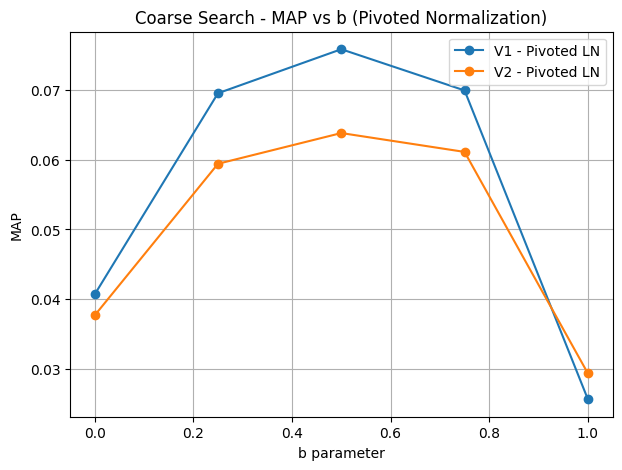

In [17]:
plt.figure(figsize=(7, 5))
plt.plot(df_coarse["b"], df_coarse["MAP_v1"], marker="o", label="V1 - Pivoted LN")
plt.plot(df_coarse["b"], df_coarse["MAP_v2"], marker="o", label="V2 - Pivoted LN")

plt.xlabel("b parameter")
plt.ylabel("MAP")
plt.title("Coarse Search - MAP vs b (Pivoted Normalization)")
plt.legend()
plt.grid(True)
plt.show()

**FINE PARAMETER SEARCH (b parameter) — both models together**

In [18]:
b_values_fine = np.arange(max(0, best_coarse_b - 0.2), min(1, best_coarse_b + 0.25), 0.05)

results_fine = []

print("\nFine search for Pivoted Normalization models (b parameter)...")
for b in b_values_fine:
    params = {"b": b}

    eval_v1 = ev.evaluate_scoring_method(
        inverted_index,
        rm.pivoted_length_normalization,
        queries,
        relevance_judgments,
        params=params,
    )

    eval_v2 = ev.evaluate_scoring_method(
        inverted_index,
        rm.pivoted_length_normalization_v2,
        queries,
        relevance_judgments,
        params=params,
    )

    results_fine.append({"b": b, "MAP_v1": eval_v1["MAP"], "MAP_v2": eval_v2["MAP"]})

    print(f"b={b:.2f}, V1_MAP={eval_v1['MAP']:.4f}, V2_MAP={eval_v2['MAP']:.4f}")

df_fine = pd.DataFrame(results_fine)

best_fine_v1 = df_fine.loc[df_fine["MAP_v1"].idxmax()]
best_fine_v2 = df_fine.loc[df_fine["MAP_v2"].idxmax()]
best_fine_row = df_fine.iloc[df_fine[["MAP_v1", "MAP_v2"]].mean(axis=1).idxmax()]


print(f"\nBest fine b (V1) = {best_fine_v1['b']:.2f}, MAP={best_fine_v1['MAP_v1']:.4f}")
print(f"Best fine b (V2) = {best_fine_v2['b']:.2f}, MAP={best_fine_v2['MAP_v2']:.4f}")
print(f"\nBest fine parameter: b={best_fine_row['b']:.2f}")


Fine search for Pivoted Normalization models (b parameter)...
b=0.30, V1_MAP=0.0713, V2_MAP=0.0607
b=0.35, V1_MAP=0.0729, V2_MAP=0.0619
b=0.40, V1_MAP=0.0743, V2_MAP=0.0632
b=0.45, V1_MAP=0.0751, V2_MAP=0.0635
b=0.50, V1_MAP=0.0758, V2_MAP=0.0638
b=0.55, V1_MAP=0.0747, V2_MAP=0.0642
b=0.60, V1_MAP=0.0742, V2_MAP=0.0643
b=0.65, V1_MAP=0.0737, V2_MAP=0.0638
b=0.70, V1_MAP=0.0721, V2_MAP=0.0627

Best fine b (V1) = 0.50, MAP=0.0758
Best fine b (V2) = 0.60, MAP=0.0643

Best fine parameter: b=0.50


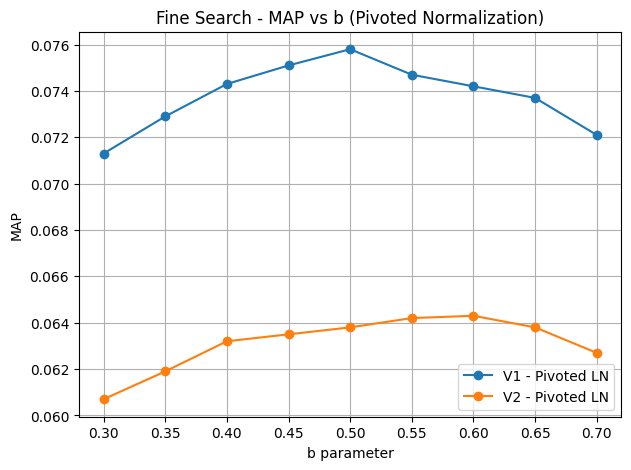

In [16]:
plt.figure(figsize=(7, 5))
plt.plot(df_fine["b"], df_fine["MAP_v1"], marker="o", label="V1 - Pivoted LN")
plt.plot(df_fine["b"], df_fine["MAP_v2"], marker="o", label="V2 - Pivoted LN")

plt.xlabel("b parameter")
plt.ylabel("MAP")
plt.title("Fine Search - MAP vs b (Pivoted Normalization)")
plt.legend()
plt.grid(True)
plt.show()

**Comparison**

Based on the coarse and fine parameter search experiments for Pivoted Normalization (b parameter), the evaluation results show that the performance of the retrieval model is highly sensitive to the value of b.

In the coarse search phase, the best MAP value for both validation sets (V1 and V2) was obtained at b = 0.50. Afterwards, in the fine search phase around that region, the model still achieved its best performance near b = 0.50 for V1, while V2 achieved its slightly highest MAP at b = 0.60. However, the improvement difference between 0.50 and 0.60 in V2 was not significant. Considering both validation sets and balancing performance, b = 0.50 remains the optimal and more stable chosen parameter overall.

**Interpretation**

Pivoted Normalization works by controlling the strength of length normalization. A very low or very high value of b led to weaker retrieval performance. Small values (0) under-normalized document lengths, and large values (1) over-normalized them, both reducing ranking quality. Middle-range values (especially around 0.50) provided a better normalization balance, preventing both bias to long documents and bias to short ones.

Therefore, the conclusion is that moderate normalization around b=0.50 leads to the best retrieval quality. Both coarse and fine search results consistently confirm that this mid-range normalization setting improves MAP performance across both validation sets.

### **ب**

In [11]:
methods = {
    "bm25_score": rm.bm25_score,
    "method1" : rm.first_suggested_approach,
    "method2": rm.second_suggested_approach,
    "method3": rm.third_suggested_approach,
    "method4": rm.fourth_suggested_approach,
    "method5": rm.fifth_suggested_approach,
    "method6": rm.sixth_suggested_approach,
    "method7": rm.seventh_suggested_approach,
    "pivot_v1": rm.pivoted_length_normalization,
    "pivot_v2": rm.pivoted_length_normalization_v2,
}

params = {
    "bm25_score": {"k": 0.8, "b": 0.35},
    "method1": {},
    "method2": {"k": 0.1},
    "method3": {"k": 0.2},
    "method4": {},
    "method5": {"k": 0.60, "b": 0.35},
    "method6": {"k": 0.80, "b": 0.35, "delta": 0.05},
    "method7": {"k": 0.80, "b": 0.35, "alpha": 0.05},
    "pivot_v1": {"b": 0.5},
    "pivot_v2": {"b": 0.6},
}

df_stats = ev.compare_methods_vs_baseline(
    methods,
    params,
    baseline_name="bm25_score",
    inverted_index=inverted_index,
    queries=queries,
    relevance_judgments=relevance_judgments,
    min_relevant=3,
)

print(df_stats.to_string(index=False))

    Method    MAP    MRR  Precision@3  Precision@10  Recall@3  Recall@10  nDCG@10  Better  Worse   p-val (AP)
   method6 0.2427 0.6238       0.4117        0.2940    0.1090     0.2398   0.4431      73    105 6.554673e-01
   method7 0.2427 0.6242       0.4100        0.2945    0.1081     0.2398   0.4442      71     98 6.598269e-01
bm25_score 0.2424 0.6244       0.4050        0.2955    0.1063     0.2401   0.4443       0      0          NaN
   method5 0.2349 0.5912       0.4000        0.2865    0.1085     0.2354   0.4337      80    103 6.963144e-02
   method3 0.2109 0.5287       0.3350        0.2510    0.0955     0.2160   0.4009      65    125 8.070288e-08
   method1 0.1499 0.4257       0.2517        0.1725    0.0745     0.1550   0.2528      23    168 8.109576e-27
   method2 0.1259 0.4025       0.2383        0.1645    0.0621     0.1332   0.2240      20    171 4.117375e-28
   method4 0.1053 0.3706       0.1900        0.1190    0.0556     0.1065   0.1820      16    175 2.658403e-31
  pivot_v1

**How p-value help us?**

The p-value in the t-test measures the probability that the observed performance difference between a method and the baseline (BM25) happened by random chance.

A small p-value (typically < 0.05) means the difference is statistically significant, suggesting that the observed improvement or drop in performance is unlikely due to randomness.
     
A large p-value (> 0.05) means there is no statistically significant difference — the method performs roughly equivalently to the baseline in terms of retrieval effectiveness.

**Interpretion**    

Method 6 and Method 7 achieved nearly identical MAP values (0.2427) with high p-values (~0.65), meaning that although their MAPs are slightly higher, the improvement is not statistically significant — their performance is essentially the same as BM25.

Method 5 showed a small decrease in MAP (0.2349) but with a borderline p-value (0.069), indicating that it performs slightly worse but close enough to BM25 to not be significantly different.

Methods 1–4 and pivot-based methods have very small p-values (< 0.001) and much lower MAP scores, which means their performance difference from BM25 is statistically significant and clearly worse.

In terms of the Better/Worse counts, BM25 outperformed most other methods in the majority of queries, though Methods 6 and 7 show that they perform better on nearly half of the queries — confirming their consistency with BM25’s effectiveness.

# **نکات مهم**

<div dir="rtl" style="font-family: Vazir; width: 85%; font-size: 16px;">
    <p><strong>مهلت تحویل بدون جریمه:</strong> ۱۸ آبان ۱۴۰۴</p>
    <p><strong>مهلت تحویل با تاخیر (با جریمه):</strong>۲۵ آبان ۱۴۰۴</p>
</div>
<h4 dir="rtl" style="font-family: Vazir; width: 85%;">فایل ارسالی شما باید با فرمت زیر نامگذاری شود: <code>IIR_CA1_STUDENTID.ipynb</code></h4>

<h4 dir="rtl" style="font-family: Vazir; width: 85%;">نحوه انجام این تمرین:</h4>
<ul dir="rtl" style="font-family: Vazir; width: 85%; font-size: 16px;"> <li>برخی سوالات نیاز به نوشتن کد پایتون و محاسبه نتایج دارند کدها بایستی طبق فایل تمرین به طور کامل نوشته شوند.</li> <li> کدها و تفسیرهای هربخش را به طور مشخص در همین نوت‌بوک بنویسید. سعی کنید هربخش به طور مشخصی جداشده باشد و ساختار نوت‌بوک خوانا باشد.</li>  </ul>

<h4 dir="rtl" style="font-family: Vazir; width: 85%;">صداقت علمی:</h4> <ul dir="rtl" style="font-family: Vazir; width: 85%; font-size: 16px;"> <li>ما نوت‌بوک‌های تعداد مشخصی از دانشجویان که به صورت تصادفی انتخاب می‌شوند، بررسی خواهیم کرد. این بررسی‌ها اطمینان حاصل می‌کنند که کدی که نوشتید واقعاً پاسخ‌های موجود در نوت‌بوک شما را تولید می‌کند. اگر پاسخ‌های صحیح را در نوت‌بوک خود بدون کدی که واقعاً آن پاسخ‌ها را تولید کند تحویل دهید، این یک مورد جدی از عدم صداقت علمی محسوب می‌شود.</li> <li>ما همچنین بررسی‌های خودکاری را برای تشخیص سرقت علمی در نوت‌بوک‌های کولب انجام خواهیم داد. کپی کردن کد از دیگران نیز یک مورد جدی از عدم صداقت علمی محسوب می‌شود.</li> </ul>

<h4 dir="rtl" style="font-family: Vazir; width: 85%;">توضیحات تکمیلی:</h4> <ul dir="rtl" style="font-family: Vazir; width: 85%; font-size: 16px;">
<li>
خوانایی و دقت بررسی‌ها در گزارش نهایی از اهمیت ویژه‌ای برخوردار است. به تمرین‌هایی که به صورت کاغذی تحویل داده شوند یا به صورت عکس در سایت بارگذاری شوند، ترتیب اثری داده نخواهد شد.</li>
<li>
 همه‌ی کدهای پیوست گزارش بایستی قابلیت اجرای مجدد داشته باشند. در صورتی که برای اجرا مجدد آن‌ها نیاز به تنظیمات خاصی می‌باشد، بایستی تنظیمات مورد نیاز را نیز در گزارش خود ذکر کنید.  دقت کنید که  تمامی کدها باید توسط شما اجرا شده باشند و نتایج اجرا در فایل کدهای ارسالی مشخص باشد. به کدهایی که نتایج اجرای آن‌ها در فایل ارسالی مشخص نباشد نمره‌ای تعلق نمی‌گیرد.
</li>
<li>
تمرین تا یک هفته بعد از مهلت تعیین شده با تاخیر تحویل گرفته می‌شود. دقت کنید که شما جمعاً برای تمام تکالیف، ۱۴ روز زمان تحویل بدون جریمه دارید که تنها از ۷ روز آن برای هر تمرین می‌توانید استفاده کنید. در صورتی که این ۱۴ روز به اتمام رسیده باشد، به ازای هر روز تاخیر ده درصد جریمه می‌شود.
</li>
<li>توجه کنید این تمرین باید به صورت تک‌نفره انجام شود و پاسخ‌های ارائه شده باید نتیجه فعالیت فرد نویسنده باشد (همفکری و به اتفاق هم نوشتن تمرین نیز ممنوع است). در صورت مشاهده
 تشابه به همه افراد مشارکت‌کننده، نمره تمرین صفر و به استاد گزارش می‌گردد.
 </li>
 <li>برای مطالعه بیشتر درباره‌ی فرمت مارک‌دون می‌توانید از <a href="https://github.com/tajaddini/Persian-Markdown/blob/master/learn-MD.md">این لینک</a> مطالعه کنید.
 </li>

 </ul>
 </div>